__Imports__

In [193]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from typing import NewType, List, Dict

__Definição de Tipos__

In [97]:
Graph = NewType('Graph', nx.Graph)
Binary = NewType('Binary', str)   # This type will represent binary codes from integers

#### Lista de Afazeres:

_Os indivíduos serão modelados como vértices em um grafo não-orientado livre de escala de Barabási-Albert de tamanho $N$, com pesos. Cada vértice $u$ é caracterizado por uma tripla $(X_{u}, L_{u}, P_{u})$, em que $L_{u}$ é uma memória de tamanho $\mu$ de códigos binários de tamanho $m$, sendo possível, assim, representar $2^{m}$ diferentes tipos de informações - denotaremos o conjunto de informações possíveis - alfabeto - como $\mathcal{A}$._

- \[ \] Criar grafo de barabasi e inicializar os nodos (memórias e probabilidades). 

__Estrutura do Grafo e Suas Propriedades__

_Parâmetros_ (Wang2017)

In [176]:
N = 30 # Graph Size
pa = 2  # Preferential Attachment Parameter

mu = 320
m  = 5  # Size of binary codes

seed = 42 # Seed for random algorithms initialization.

In [9]:
G = nx.barabasi_albert_graph(N, pa, seed)

Como verificar se o gráfico possui a propriedade correta?

In [188]:
def verify_scalefree_property(G: Graph) -> None:
    unique_degrees = {degree:(lambda x: degrees.count(x)/(N*100))(degree) for degree \
                                                          in sorted(set([degree for _, degree in list(G.degree)]))}

Inicializando as memórias.

_Se definirmos $\varphi(\cdot)$ como um operador que converte números inteiros em suas representações binárias, então o estado inicial da memória de um vértice $u$, $L_{u}(0)$, é dado por_

$$
      L_{u}(0) = \{x_{i}\; |\; i = 1, \dots, \mu;\;\; x_{i} = \varphi(X),\;\;  X \thicksim  B (2^{m}, 0.5) \}
$$

_onde $B(2^{m}, 0.5)$ é uma distribuição binomial com parâmetros $(n, p) = (2^{n}, 0.5)$, aproximando uma distribuição normal com parâmetros $(\mu, \sigma^2) = (2^{n - 1}, 2^{n - 2})$._

In [180]:
to_int = lambda x: int('0b'+x, 2)             # Add prefix
to_bin = lambda x: bin(x)[2:]                 # Remove prefix
complete_zeros = lambda x: '0'*(s - len(x))+x # add zeros at the beginning of the binary code if its length isn't equal to s

def get_binary_codes(code_length: int, n_codes: int = None) -> List[Binary]:
    '''
    Return a list of binary codes (without prefix) of integers drawn from a Binomial Distribution with parameters (n, 0.5)
    where n = 2**m
    '''
    return [complete_zeros(to_bin(a)) for a in np.random.binomial(2**s, 0.5, size = n_codes)] if n_codes != None else \
           [complete_zeros(to_bin(np.random.binomial(2**s, 0.5)))]

def initialize_memory(mu: int, m: int) -> List[Binary]:
    return get_binary_codes(code_length = m, n_codes = mi)

def probability_distribution(codes: List[Binary]) -> Dict[Binary, float]:
    return {code:(lambda x: codes.count(x)/(len(codes)))(code) \
                                        for code in set(codes)}

In [196]:
sample = initialize_memory(mu, m)

__To do:__

- Faça uma função para retornar uma figura pré-formatada para plotar curvas. Padronize a formatação desses gráficos.

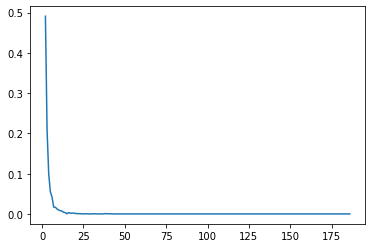

In [73]:
plt.plot(list(unique_degrees.keys()), list(unique_degrees.values()))